### Processo harmonico.

Temos $Z_1, Z_2 \sim N(0, \sigma^2)$ e $\lambda \in \mathbb{R}$.

Este é um processo estacionario e gaussiano, significando que também é estritamente estacionario. 

Temos os seguintes resultados:
$$
\begin{align}
m_X (t) &= 0 \\
K(s,t) &= \sigma^2 \cos(\lambda (s-t))
\end{align}
$$

In [2]:
import numpy as np
import scipy.stats as stats
import statsmodels.tsa.stattools as sm

import matplotlib.pyplot as plt

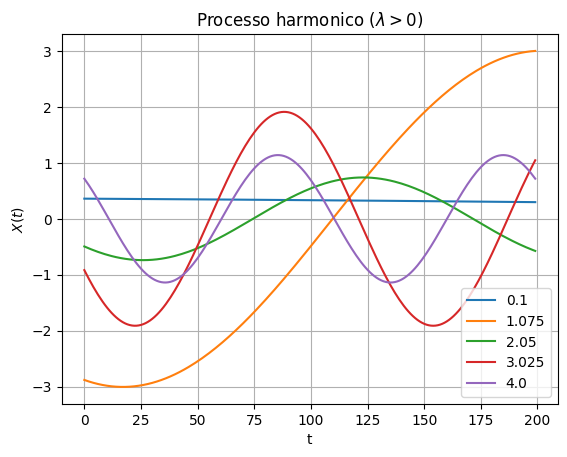

In [3]:
T= np.pi
t_span = np.linspace(0.0, T, 200)
t_fixed = np.pi/3

# Gerar uma serie de frequencias diferentes.
frequencias = np.linspace(0.10, 4, num = 5)

fig, ax = plt.subplots()

for i in range(5):
    z1, z2 = stats.norm.rvs(size=2)
    X = z1 * np.cos(frequencias[i]* t_span) + z2*np.sin(frequencias[i]*t_span)
    ax.plot(X, label=f'{frequencias[i]}')
    
ax.set(xlabel = 't', ylabel=f'$X(t)$', title=f'Processo harmonico ($\lambda > 0$)')
ax.grid()
plt.legend(loc='lower right')
plt.show()

In [5]:
fig.savefig("AmostraHarmonica.png")

In [15]:
n_sims = 5000
lags = np.linspace(-5, 5, 100)
Z1_all = stats.norm.rvs(size=100)
Z2_all = stats.norm.rvs(size=100)
lam = 4

empirical_cov = np.zeros(len(lags))
for i, tau in enumerate(lags):
    X_t = Z1_all * np.cos(lam * 5) + Z2_all * np.sin(lam * 5) #Lag de 5
    X_s = Z1_all * np.cos(lam * (5 - tau)) + Z2_all * np.sin(lam * (5 - tau))
    empirical_cov[i] = np.mean(X_t * X_s)

In [33]:
n_time_points = 50
empirical_means = []

for i, time_point in enumerate(t_span):
    samples = Z1_all * np.cos(lam * time_point) + Z2_all * np.sin(lam * time_point)
    empirical_means.append(np.mean(samples))

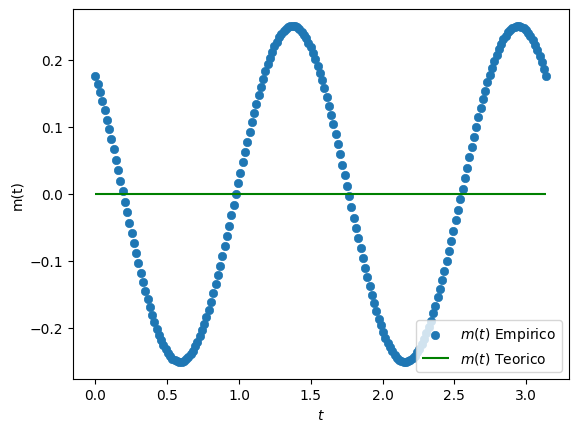

In [66]:
fig, ax = plt.subplots()

ax.scatter(t_span, empirical_means, label = '$m(t)$ Empirico', lw=0.5)
ax.hlines(y=0, xmin=0, xmax=T, label="$m(t)$ Teorico", color = 'green')
plt.legend(loc='lower right')
ax.set_xlabel('$t$')
ax.set_ylabel('m(t)')

fig.savefig("MediaHarmonica.png")

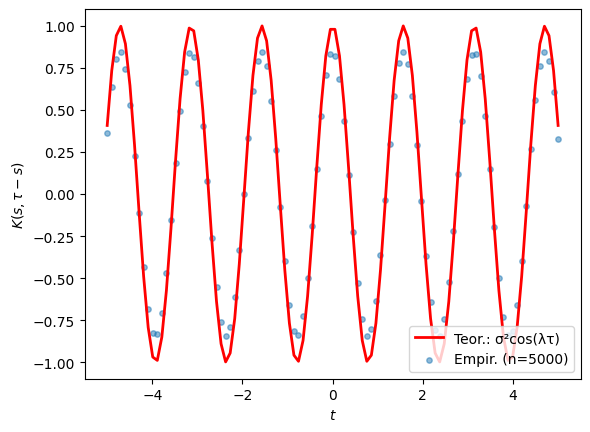

In [64]:

fig, ax = plt.subplots()
theoretical_cov = np.cos(lam * lags)


ax.plot(lags, theoretical_cov, 'r-', linewidth=2, label='Teor.: σ²cos(λτ)')
ax.scatter(lags, empirical_cov, alpha=0.5, s=15, label=f'Empir. (n={n_sims})')
ax.legend(loc='lower right')
ax.set_xlabel('$t$')
ax.set_ylabel(f'$K(s, τ - s)$')

plt.savefig("CovarianciaHarmonica.png")

## Processos aproximadamente gaussianos - Processo de Poisson

Conforme $\lambda \to \infty$ temos que o processo se aproxima de um processo gaussiano.

O problema aqui é que a curtose e assimetria convergem para o de uma normal absurdamente rapido. Somente para $0<\lambda < 1$ temos resultados notaveis. Qualquer outro e temos uma normal padrão *muito* rapido. Os ganhos entre $\lambda = 3$ vs $\lambda = 300$ são muito pequenos.

In [169]:

taxas_lambda = np.linspace(1, 21, 3)# taxas do processo de poisson.
tempos_fixos = np.linspace(1, 6, 3)# t_0 = instante no tempo.

#Tive que mudar a dimensão da *array* de taxas pois o broadcasting não
#funciona se não tiverem dimensões parecidas ou não for um escalar.
Amostras = []


for i, taxa in enumerate(taxas_lambda):
    linhas = []
    for j, tempo in enumerate(tempos_fixos):
        Nt = np.random.poisson(taxa*tempo, size = 1000)
        Z = (Nt-tempo*taxa)/np.sqrt(taxa*tempo) #Normalização dos dados Poisson.
        linhas.append(Z)
    Amostras.append(linhas)

Amostras = np.array(Amostras)
Amostras.shape

(3, 3, 1000)

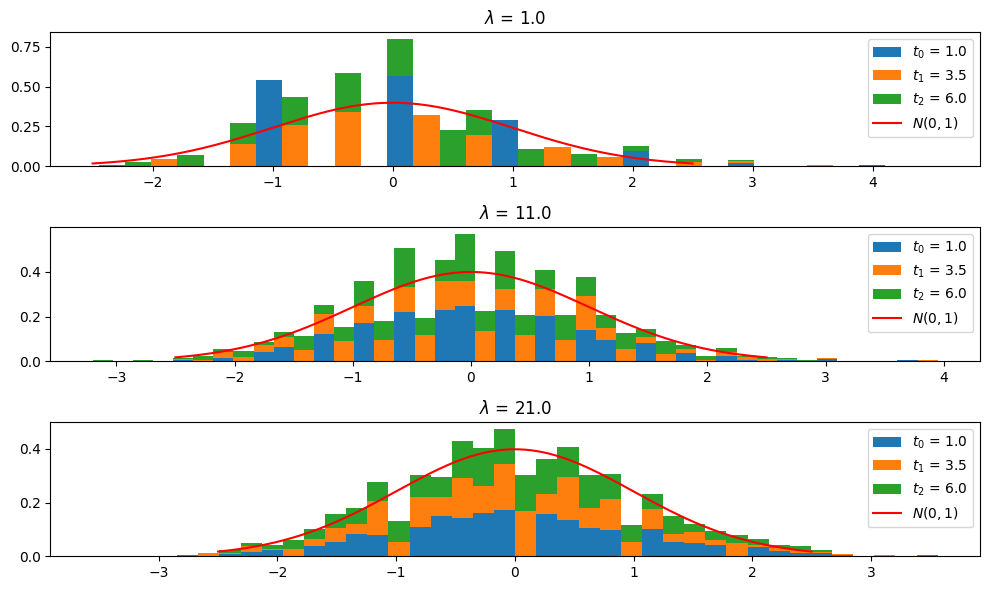

In [171]:
fig, axes = plt.subplots(3,1, figsize = (10,6))
x = np.linspace(-2.5, 2.5, 200)

labels = [f"$t_{i}$ = {t}" for i, t in enumerate(tempos_fixos)]


#preciso achar um jeito melhor de fazer isso.
for i, (linha, ax) in enumerate(zip(Amostras, axes)):
    ax.hist(linha.T, bins='auto', density=True, histtype='bar',
            stacked=True, label = labels)
    ax.plot(x, stats.norm.pdf(x), color = 'red', label = f'$N(0,1)$')
    ax.set_title(f"$\lambda$ = {taxas_lambda[i]}")
    ax.legend()

plt.tight_layout()
plt.show()

In [173]:
fig.savefig("ApproxPoisson.png")

## Ornstein-Uhlenbeck process

Um processo dado por $X(t)= e^{-\alpha t} W(2\alpha t)$ onde $W(\cdot)$ é um processo de Wiener. Pode-se mostrar que $X(t)$ é um processo gaussiano.

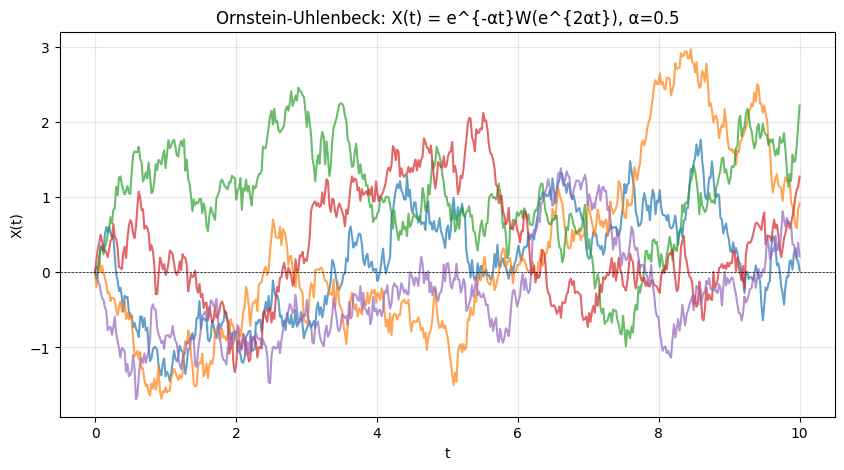

In [97]:
np.random.seed(42)

# Parametros
alpha = 0.5 # A força da atração para a tendencia central.
T = 10
n_points = 500
t = np.linspace(0, T, n_points)
specific_lag = 2.0

# Simular X(t) = e^{-αt} W(e^{2αt})
def simulate_ou_path(t, alpha):
    s = np.exp(2 * alpha * t)
    ds = np.diff(s)
    dW = np.random.randn(len(ds)) * np.sqrt(ds)
    W_s = np.concatenate([[0], np.cumsum(dW)])
    X_t = np.exp(-alpha * t) * W_s
    return X_t

# Realizações.
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(5):
    X_t = simulate_ou_path(t, alpha)
    ax.plot(t, X_t, alpha=0.7, label=f'Path {i+1}')

ax.set_title(f'Ornstein-Uhlenbeck: X(t) = e^{{-αt}}W(e^{{2αt}}), α={alpha}')
ax.set_xlabel('t')
ax.set_ylabel('X(t)')
ax.grid(alpha=0.3)
ax.axhline(0, color='k', linestyle='--', linewidth=0.5)
fig.savefig("Amostra-OU.png")

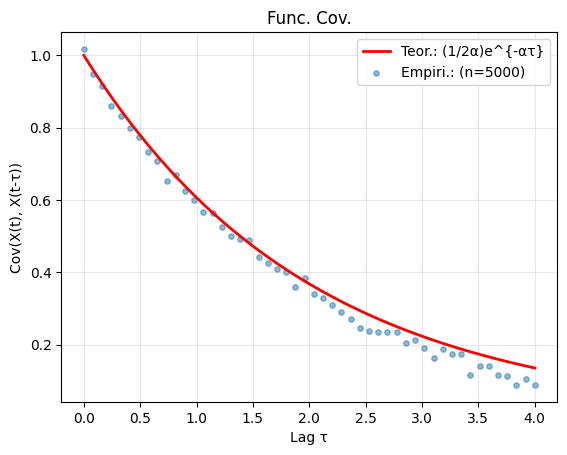

In [99]:
n_sims = 5000
t_fixed = 5.0
lags = np.linspace(0, 4, 50)

empirical_cov = np.zeros(len(lags))

for lag_idx, lag in enumerate(lags):
    X_t_all = np.zeros(n_sims)
    X_s_all = np.zeros(n_sims)
    
    for i in range(n_sims):
        t_sim = np.linspace(0, t_fixed, 200)
        X_path = simulate_ou_path(t_sim, alpha)
        
        X_t_all[i] = X_path[-1]
        
        idx_lag = np.argmin(np.abs(t_sim - (t_fixed - lag)))
        X_s_all[i] = X_path[idx_lag]
    
    empirical_cov[lag_idx] = np.mean(X_t_all * X_s_all)

theoretical_cov = (1 / (2 * alpha)) * np.exp(-alpha * lags)

fig,ax = plt.subplots()

ax.plot(lags, theoretical_cov, 'r-', linewidth=2, label='Teor.: (1/2α)e^{-ατ}')
ax.scatter(lags, empirical_cov, alpha=0.5, s=15, label=f'Empiri.: (n={n_sims})')
ax.set_xlabel('Lag τ')
ax.set_ylabel('Cov(X(t), X(t-τ))')
ax.set_title('Func. Cov.')
ax.legend()
ax.grid(alpha=0.3)

fig.savefig("OU-Covariancia.png")